# Baseball Databank

Site: https://www.seanlahman.com/baseball-archive/statistics/

Documentation: https://www.seanlahman.com/files/database/readme2021.txt

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cpi

In [4]:
salaries = pd.read_csv("data/salaries.csv")

In [24]:
salaries["inflated_salary"] = [cpi.inflate(salary, year) for salary, year in zip(salaries.salary, salaries.yearID)]

In [25]:
salaries

,yearID,teamID,lgID,playerID,salary,inflated_salary
0,1985,ATL,NL,barkele01,870000,2.190928e+06
1,1985,ATL,NL,bedrost01,550000,1.385070e+06
2,1985,ATL,NL,benedbr01,545000,1.372478e+06
3,1985,ATL,NL,campri01,633333,1.594928e+06
4,1985,ATL,NL,ceronri01,625000,1.573943e+06
...,...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000,1.174169e+07
26424,2016,WAS,NL,taylomi02,524000,5.916006e+05
26425,2016,WAS,NL,treinbl01,524900,5.926167e+05
26426,2016,WAS,NL,werthja01,21733615,2.453744e+07


In [27]:
# plot salary mean by year
mean_salaries = salaries.groupby("yearID").mean()
mean_salaries

,salary,inflated_salary
yearID,,
1985,4.762994e+05,1.199469e+06
1986,4.171470e+05,1.031335e+06
1987,4.347295e+05,1.036960e+06
1988,4.531711e+05,1.038003e+06
1989,5.063231e+05,1.106438e+06
1990,5.119737e+05,1.061435e+06
1991,8.949612e+05,1.780526e+06
1992,1.047521e+06,2.023141e+06
1993,9.769666e+05,1.832032e+06


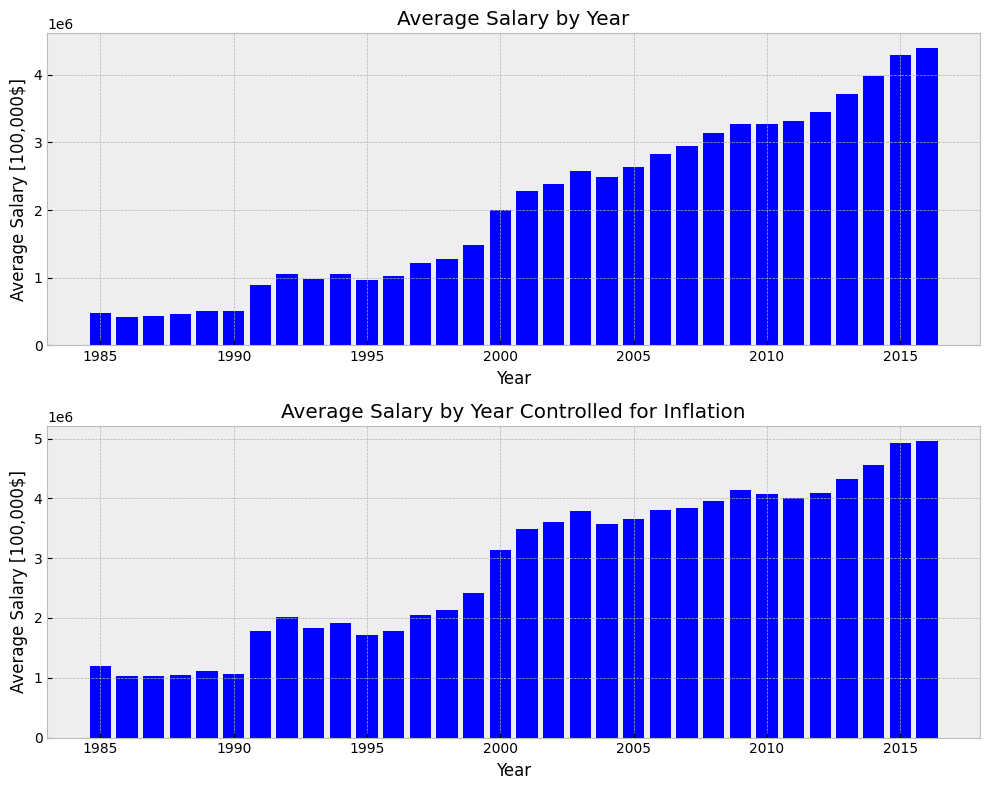

In [31]:
plt.style.use("bmh")

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

ax1, ax2 = axes

ax1.bar(mean_salaries.index, mean_salaries["salary"], color="blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Salary [100,000$]")
ax1.set_title("Average Salary by Year")

ax2.bar(mean_salaries.index, mean_salaries["inflated_salary"])
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Salary [100,000$]")
ax2.set_title("Average Salary by Year Controlled for Inflation")

plt.tight_layout()
